## Import libraries and data

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [111]:
df = pd.read_csv('stages_TDF.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2235
Data columns (total 8 columns):
Stage             2184 non-null object
Date              2184 non-null object
Distance          2184 non-null float64
Origin            2184 non-null object
Destination       2184 non-null object
Type              2184 non-null object
Winner            2184 non-null object
Winner_Country    2184 non-null object
dtypes: float64(1), object(7)
memory usage: 153.6+ KB


## Analysis of french victory number over time

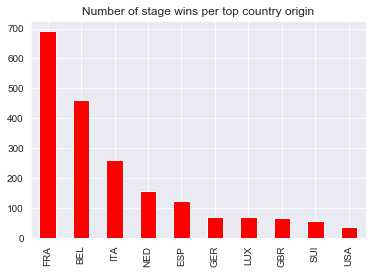

In [113]:
df['Winner_Country'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Number of stage wins per top country origin')
plt.show() # add stage type

France is still today the country with the most number of stage wins. Here is the leaderboard of the most french wins of all time. These ridders are all retired for a long time now).

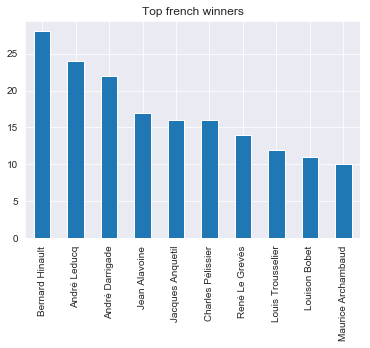

In [102]:
france_wins = df.loc[(df['Winner_Country']=='FRA')]
france_wins['Winner'].value_counts().head(10).plot(kind='bar')
plt.title('Top french winners')
plt.show() # add stage type

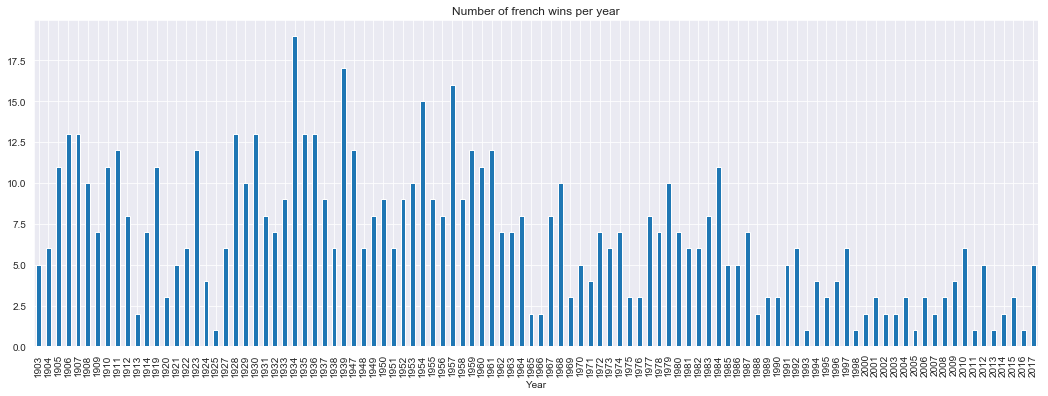

In [115]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].map(lambda x: x.year)

df.loc[(df['Winner_Country']=='FRA')].groupby('Year').count()['Stage'].plot(kind='bar', figsize=(18, 6))
plt.title('Number of french wins per year')
plt.show()

The number of french wins is slowly decreasing and hasn't been higher thn 6 since the 1987. As we can see below, the proportion of french wins overtime is quickly decreasing contrarily to Belgium and Italy (the 2nd and the 3rd country with the most stage wins).

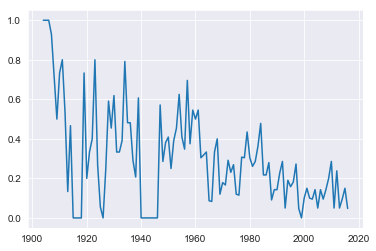

In [120]:
from sklearn import datasets, linear_model

y, p =[], []

for year in range(1904,2017):
    y.append(year)
    
    stages = df.loc[(df['Year']==year)]
    fra_wins = df.loc[(df['Year']==year) & (df['Winner_Country']=='FRA')]
    bel_wins = df.loc[(df['Year']==year) & (df['Winner_Country']=='BEL')]
    ita_wins = df.loc[(df['Year']==year) & (df['Winner_Country']=='ITA')]
    if len(stages)!=0:
        proportion = len(fra_wins)/len(stages) #, len(bel_wins)/len(stages), len(ita_wins)/len(stages)]
        p.append(proportion)
    else : 
        p.append(0)

plt.plot(y,p) #ajouter courbe de tendance
plt.show()

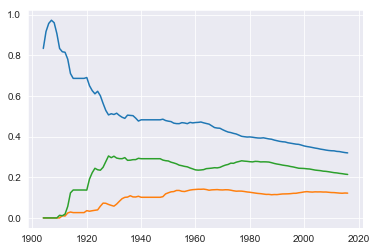

In [116]:
y, p =[], []

for year in range(1904,2017):
    y.append(year)
    
    before = df.loc[(df['Date']<="{}-01-01".format(year))]
    FRA_before = df.loc[(df['Date']<="{}-01-01".format(year)) & (df['Winner_Country']=='FRA')]
    BEL_before = df.loc[(df['Date']<="{}-01-01".format(year)) & (df['Winner_Country']=='ITA')]
    ITA_before = df.loc[(df['Date']<="{}-01-01".format(year)) & (df['Winner_Country']=='BEL')]
    proportion = [len(FRA_before)/len(before), len(BEL_before)/len(before), len(ITA_before)/len(before)]
    p.append(proportion)
    
plt.plot(y,p)
plt.show()